# Setting the Notebook Precision

In [1]:
from decimal import getcontext, Decimal
getcontext().prec = 16
print(getcontext())

Context(prec=16, rounding=ROUND_HALF_EVEN, Emin=-999999, Emax=999999, capitals=1, clamp=0, flags=[], traps=[InvalidOperation, DivisionByZero, Overflow])


# Function Definitions

$$\sum_{j=1}^n \frac{1}{j(j+1)}$$
I'll define the functions for computing the summation forward and backward.

In [2]:
def forward(n):
    s = Decimal(0)
    for j in range(1, n + 1):
        s += Decimal(1) / (Decimal(j) * Decimal(j+1))
    return s

def backward(n):
    s = Decimal(0)
    for j in range(n, 0, -1):
        s += Decimal(1) / (Decimal(j) * Decimal(j+1))
    return s

$$\frac{n}{n+1}$$

Next I'll define the function for computing the actual value.

In [3]:
def actual(n):
    return Decimal(n/(n+1))

# Error calculation for n = 10000

In [4]:
abs(forward(10000) - actual(10000))

Decimal('6.166172747209202E-16')

In [5]:
abs(backward(10000) - actual(10000))

Decimal('1.661727472092025E-17')

# Error calculation for n = 5000000

In [6]:
abs(forward(5000000) - actual(5000000))

Decimal('3.636227775360239E-14')

In [7]:
abs(backward(5000000) - actual(5000000))

Decimal('3.772224639760680E-17')

# Error calculation for n = 50000000

In [8]:
abs(forward(50000000) - actual(50000000))

Decimal('2.587845461632681E-11')

In [9]:
abs(backward(50000000) - actual(50000000))

Decimal('5.461632680598996E-17')

# Conclusion



Importing more pacakges for analysis.

In [10]:
import numpy as np
import matplotlib.pyplot as plt

I want to see how the absolute error values change as values of n increase. I'm going to collect some data and then plot it. The following cells will take a bit of time to run.

In [11]:
x = [int(i) for i in np.linspace(0, 5000000, 10)]
y1 = [abs(forward(i) - actual(i)) for i in x]
y2 = [abs(backward(i) - actual(i)) for i in x]

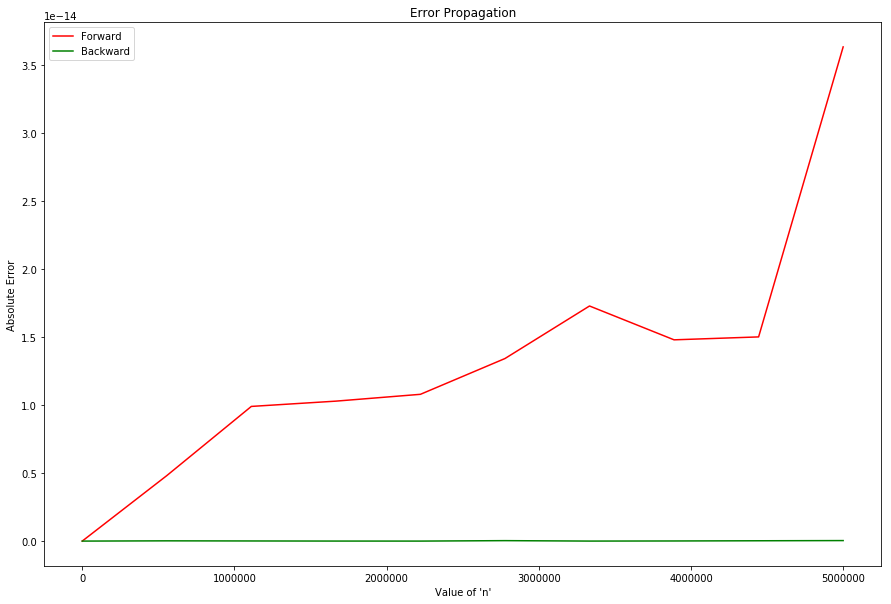

In [12]:
plt.rcParams["figure.figsize"] = (15, 10)
plt.title('Error Propagation')
plt.plot(x, y1, 'r', label='Forward')
plt.plot(x, y2, 'g', label='Backward')
plt.xlabel('Value of \'n\'')
plt.ylabel('Absolute Error')
plt.legend()
plt.show()

It's pretty clear that the forward computation error propagates much faster than the backward computation error.